In [109]:
# import dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.patches as mpatches
import requests
import json
from pprint import pprint

In [54]:
# import merged dataset
path = "Resources/merged_data.csv"
pollution_df = pd.read_csv(path)
pollution_df

,Unnamed: 0,COMPLAINT ID,COMPLAINT TYPE,ADDRESS,Neighborhood,STREET NUMBER FROM,STREET NUMBER TO,DIRECTION,STREET NAME,STREET TYPE,...,LONGITUDE,LOCATION,Community Area Number,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,0,DOECOMP29999,Air Pollution Work Order,"700 E 107TH ST, CHICAGO, IL",Pullman,700,NaN,E,107TH,ST,...,NaN,NaN,50.0,1.5,21.6,22.8,13.1,38.6,20588,51.0
1,1,DOECOMP29998,Air Pollution Work Order,"700 E 107TH ST, CHICAGO, IL",Pullman,700,NaN,E,107TH,ST,...,NaN,NaN,50.0,1.5,21.6,22.8,13.1,38.6,20588,51.0
2,2,DOECOMP30000,Air Pollution Work Order,"700 E 107TH ST, CHICAGO, IL",Pullman,700,NaN,E,107TH,ST,...,NaN,NaN,50.0,1.5,21.6,22.8,13.1,38.6,20588,51.0
3,3,DOECOMP1839,Air Pollution Work Order,"11436 S FORRESTVILLE AVE, CHICAGO, IL",Pullman,11436,NaN,S,FORRESTVILLE,AVE,...,NaN,NaN,50.0,1.5,21.6,22.8,13.1,38.6,20588,51.0
4,4,DOECOMP8772,Air Pollution Work Order,"2019 W 111TH ST, CHICAGO, IL",Morgan Park,2019,NaN,W,111TH,ST,...,NaN,NaN,75.0,0.8,13.2,15.0,10.8,40.3,27149,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,243,DOECOMP31879,Air Pollution Work Order,"7600 S SEELEY AVE, CHICAGO, IL",Auburn Gresham,7600,NaN,S,SEELEY,AVE,...,NaN,NaN,71.0,4.0,27.6,28.3,18.5,41.9,15528,74.0
244,244,DOECOMP32306,Air Pollution Work Order,"7901 S WENTWORTH AVE, CHICAGO, IL",Auburn Gresham,7901,NaN,S,WENTWORTH,AVE,...,NaN,NaN,71.0,4.0,27.6,28.3,18.5,41.9,15528,74.0
245,245,DOECOMP32307,Air Pollution Work Order,"7901 S WENTWORTH AVE, CHICAGO, IL",Auburn Gresham,7901,NaN,S,WENTWORTH,AVE,...,NaN,NaN,71.0,4.0,27.6,28.3,18.5,41.9,15528,74.0
246,246,DOECOMP35677,Air Pollution Work Order,"13000 S TORRENCE AVE, CHICAGO, IL",South Deering,13000,NaN,S,TORRENCE,AVE,...,NaN,NaN,51.0,4.0,29.2,16.3,21.0,39.5,14685,65.0


In [55]:
# group by neighborhood and find the frequency of complaints per neighborhood
grouped_df = pollution_df.groupby(by="Neighborhood")
# finds the number of complaints and avg income per neighborhood
grouped_complaint = pd.DataFrame()
grouped_complaint["Complaint frequency"] = grouped_df["COMPLAINT TYPE"].count()
grouped_complaint["Avg Per Capita Income"] = grouped_df["PER CAPITA INCOME "].mean()
grouped_complaint.head()

,Complaint frequency,Avg Per Capita Income
Neighborhood,,
Albany Park,4,21323.0
Archer Heights,1,16134.0
Ashburn,4,23482.0
Auburn Gresham,4,15528.0
Austin,4,15957.0


The r-squared is: 0.007885192385480338


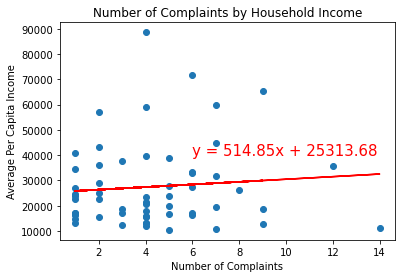

In [56]:
# scatter plot Y - income  X - frequency of complaint; linear regression
# set up x and y values
x_values = grouped_complaint['Complaint frequency']
y_values = grouped_complaint['Avg Per Capita Income']
# create linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot scatter plot with lin regress line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# formatting
plt.annotate(line_eq,(6,40000),fontsize=15,color="red")
plt.ylabel('Average Per Capita Income')
plt.xlabel('Number of Complaints')
plt.title("Number of Complaints by Household Income")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [104]:
# set up the larger regions based on https://commons.wikimedia.org/wiki/File:Chicago_neighborhoods_map.png
far_north = ["Edison Park", "Norwood Park", "Jefferson Park",
            "Forest Glen", "North Park", "Albany Park", "West Ridge", 
            "Lincoln Square", "Rogers Park", "Edgewater", "Uptown"]
northwest = ["Dunning", "Portage Park", "Montclare", "Belmont Cragin",
            "Hermosa", "Irving Park"]
north = ["Avondale", "North Center", "Lake View", "Lincoln Park", "Logan Square"]
central = ["Near North Side", "Loop", "Near South Side"]
west = ["Austin", "Humboldt Park", "West Town", "West Garfield Park",
        "East Garfield Park", "Near West Side", "Lower West Side", 
        "North Lawndale", "South Lawndale"]
southwest = ["Garfield Ridge", "Clearing", "Archer Heights", "West Elsdon"
            "Brighton Park", "Gage Park", "McKinley Park", "New City",
            "West Lawn", "Chicago Lawn", "West Englewood", "Englewood", "Brighton Park"]
south = ["Bridgeport", "Armor Square", "Douglas", "Fuller Park", "Grand Boulevard",
        "Oakland", "Kenwood", "Washington Park", "Hyde Park", "Woodlawn",
        "Greater Grand Crossing", "South Shore"]
far_southwest = ["Ashburn", "Auburn Gresham", "Washington Heights",
                "Beverly", "Mount Greenman", "Morgan Park", "Mount Greenwood"]
far_southeast = ["Chatham", "Avalon Park", "South Chicago", "Calumet Heights",
                "Burnside", "Roseland", "West Pullman", "Riverdale", "Hegewisch",
                "South Deering", "East Side", "Pullman"]

In [120]:
# create new df with region info for each complaint added
regions_df = pollution_df
regions_df["Region"] = ""
for index, neighborhood in enumerate(pollution_df["Neighborhood"]):
    if neighborhood in far_north:
        regions_df.loc[index, "Region"] = "Far North"
    elif neighborhood in northwest:
        regions_df.loc[index, "Region"] = "Northwest"
    elif neighborhood in north:
        regions_df.loc[index, "Region"] = "North"
    elif neighborhood in central:
        regions_df.loc[index, "Region"] = "Central"
    elif neighborhood in west:
        regions_df.loc[index, "Region"] = "West"
    elif neighborhood in southwest:
        regions_df.loc[index, "Region"] = "Southwest"
    elif neighborhood in south:
        regions_df.loc[index, "Region"] = "South"
    elif neighborhood in far_southwest:
        regions_df.loc[index, "Region"] = "Far Southwest"
    elif neighborhood in far_southeast:
        regions_df.loc[index, "Region"] = "Far Southeast"
regions_df

,Unnamed: 0,COMPLAINT ID,COMPLAINT TYPE,ADDRESS,Neighborhood,STREET NUMBER FROM,STREET NUMBER TO,DIRECTION,STREET NAME,STREET TYPE,...,LOCATION,Community Area Number,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Region
0,0,DOECOMP29999,Air Pollution Work Order,"700 E 107TH ST, CHICAGO, IL",Pullman,700,NaN,E,107TH,ST,...,NaN,50.0,1.5,21.6,22.8,13.1,38.6,20588,51.0,Far Southeast
1,1,DOECOMP29998,Air Pollution Work Order,"700 E 107TH ST, CHICAGO, IL",Pullman,700,NaN,E,107TH,ST,...,NaN,50.0,1.5,21.6,22.8,13.1,38.6,20588,51.0,Far Southeast
2,2,DOECOMP30000,Air Pollution Work Order,"700 E 107TH ST, CHICAGO, IL",Pullman,700,NaN,E,107TH,ST,...,NaN,50.0,1.5,21.6,22.8,13.1,38.6,20588,51.0,Far Southeast
3,3,DOECOMP1839,Air Pollution Work Order,"11436 S FORRESTVILLE AVE, CHICAGO, IL",Pullman,11436,NaN,S,FORRESTVILLE,AVE,...,NaN,50.0,1.5,21.6,22.8,13.1,38.6,20588,51.0,Far Southeast
4,4,DOECOMP8772,Air Pollution Work Order,"2019 W 111TH ST, CHICAGO, IL",Morgan Park,2019,NaN,W,111TH,ST,...,NaN,75.0,0.8,13.2,15.0,10.8,40.3,27149,30.0,Far Southwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,243,DOECOMP31879,Air Pollution Work Order,"7600 S SEELEY AVE, CHICAGO, IL",Auburn Gresham,7600,NaN,S,SEELEY,AVE,...,NaN,71.0,4.0,27.6,28.3,18.5,41.9,15528,74.0,Far Southwest
244,244,DOECOMP32306,Air Pollution Work Order,"7901 S WENTWORTH AVE, CHICAGO, IL",Auburn Gresham,7901,NaN,S,WENTWORTH,AVE,...,NaN,71.0,4.0,27.6,28.3,18.5,41.9,15528,74.0,Far Southwest
245,245,DOECOMP32307,Air Pollution Work Order,"7901 S WENTWORTH AVE, CHICAGO, IL",Auburn Gresham,7901,NaN,S,WENTWORTH,AVE,...,NaN,71.0,4.0,27.6,28.3,18.5,41.9,15528,74.0,Far Southwest
246,246,DOECOMP35677,Air Pollution Work Order,"13000 S TORRENCE AVE, CHICAGO, IL",South Deering,13000,NaN,S,TORRENCE,AVE,...,NaN,51.0,4.0,29.2,16.3,21.0,39.5,14685,65.0,Far Southeast


In [125]:
# create new groupby to see number of complaints per region
grouped_region = regions_df.groupby(by="Region")
grouped_region_complaint = pd.DataFrame()
grouped_region_complaint["Complaint Count"] = grouped_region["COMPLAINT TYPE"].count()
grouped_region_complaint.reset_index(inplace=True)

# x and y values for graph
regions = grouped_region_complaint["Region"]
complaint_num = grouped_region_complaint["Complaint Count"]
ticks = [value for value in regions]

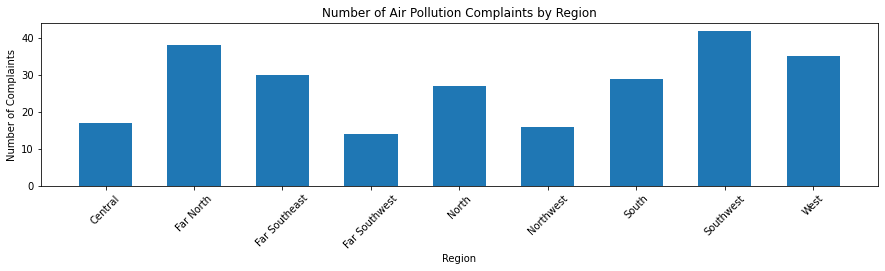

In [129]:
# create bar graph
plt.figure(figsize=(15, 3))

figure = plt.bar(regions, complaint_num, align='center', width=0.6)
# formatting
plt.xticks(ticks, regions, rotation=45)
plt.xlabel("Region")
plt.ylabel("Number of Complaints")
plt.title("Number of Air Pollution Complaints by Region")
plt.show()

In [79]:
# Bar - neighborhoods / # complaints (color bars by region)
grouped_df = grouped_complaint.reset_index()
# retrieve columns of data to be used in bar chart
neighborhoods = grouped_df["Neighborhood"]
complaints = grouped_df["Complaint frequency"]
tick_locations = [value for value in neighborhoods]

0                Albany Park
1             Archer Heights
2                    Ashburn
3             Auburn Gresham
4                     Austin
5                Avalon Park
6                   Avondale
7             Belmont Cragin
8                    Beverly
9                 Bridgeport
10             Brighton Park
11           Calumet Heights
12                   Chatham
13              Chicago Lawn
14                  Clearing
15                   Douglas
16                   Dunning
17        East Garfield Park
18                 East Side
19                 Edgewater
20               Edison Park
21                 Englewood
22                 Gage Park
23    Greater Grand Crossing
24                 Hegewisch
25                 Hyde Park
26               Irving Park
27            Jefferson Park
28                   Kenwood
29                 Lake View
30              Lincoln Park
31            Lincoln Square
32              Logan Square
33                      Loop
34           L

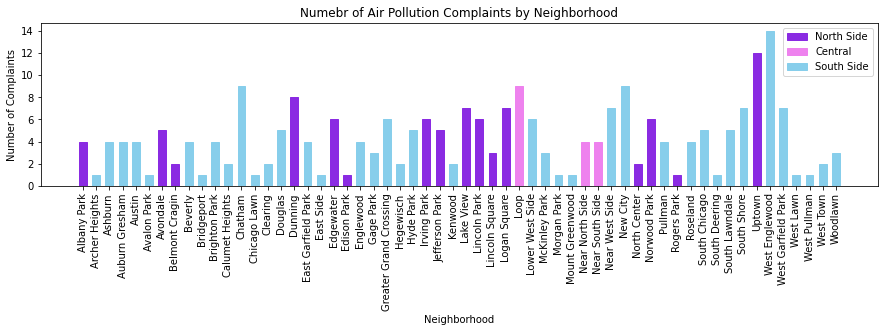

In [130]:
plt.figure(figsize=(15, 3)) # width 20, height 3
# create bar graph
figure = plt.bar(neighborhoods, complaints, align='center', width=0.6)
plt.xticks(tick_locations, neighborhoods, rotation=90)
# color code based on larger region
for index, area in enumerate(neighborhoods):
    if area in far_north:
        figure[index].set_color('blueviolet')
    if area in northwest:
        figure[index].set_color('blueviolet')
    if area in north:
        figure[index].set_color('blueviolet')        
    if area in central:
        figure[index].set_color('violet')
    if area in west:
        figure[index].set_color('skyblue')
    if area in southwest:
        figure[index].set_color('skyblue')
    if area in south:
        figure[index].set_color('skyblue')
    if area in far_southwest:
        figure[index].set_color('skyblue')
    if area in far_southeast:
        figure[index].set_color('skyblue')
# formatting
plt.ylabel("Number of Complaints")
plt.xlabel("Neighborhood")
plt.title("Numebr of Air Pollution Complaints by Neighborhood")
# legend info
purple = mpatches.Patch(color='blueviolet', label='North Side')
teal = mpatches.Patch(color="skyblue", label="South Side")
pink = mpatches.Patch(color="violet", label="Central")
plt.legend(handles=[purple, pink, teal])

plt.show()